In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [36]:
# Load the dataset
dataset = pd.read_csv('/content/drive/MyDrive/5000_final.csv')

In [37]:
dataset.head()

,pdbid,binding_affinity (kcal/mol),binding_affinity_sd (kcal/mol),electrostatic (kcal/mol),electrostatic_sd (kcal/mol),polar_solvation (kcal/mol),polar_solvation_sd (kcal/mol),non_polar_solvation (kcal/mol),non_polar_solvation_sd (kcal/mol),vdW (kcal/mol)
0,6g3f,-0.25570,1.19548,-0.98408,1.12502,-0.34568,0.24300,1.26248,1.12080,-0.18842
1,5fpd,-2.61456,2.67150,-1.01432,1.22772,-0.56942,0.40202,1.62432,1.48674,-2.65510
2,6hxe,-0.98558,2.57244,-8.41628,3.52346,-0.81082,0.32616,7.90220,3.00116,0.33930
3,5nqb,-1.05920,1.90178,-36.85828,13.23790,-0.46456,0.24828,34.03790,11.65862,2.22572
4,4q3f,-1.52816,1.87006,-5.36862,3.20528,-0.74246,0.32006,5.44818,2.73016,-0.86530


In [38]:
# Extract features
X = dataset.iloc[:,3:]

In [39]:
X

,electrostatic (kcal/mol),electrostatic_sd (kcal/mol),polar_solvation (kcal/mol),polar_solvation_sd (kcal/mol),non_polar_solvation (kcal/mol),non_polar_solvation_sd (kcal/mol),vdW (kcal/mol)
0,-0.98408,1.12502,-0.34568,0.24300,1.26248,1.12080,-0.18842
1,-1.01432,1.22772,-0.56942,0.40202,1.62432,1.48674,-2.65510
2,-8.41628,3.52346,-0.81082,0.32616,7.90220,3.00116,0.33930
3,-36.85828,13.23790,-0.46456,0.24828,34.03790,11.65862,2.22572
4,-5.36862,3.20528,-0.74246,0.32006,5.44818,2.73016,-0.86530
...,...,...,...,...,...,...,...
4995,-35.92384,4.92902,-3.85320,0.13716,38.94632,4.06886,-36.19790
4996,0.00000,0.00000,-0.38658,0.22966,4.42818,0.58870,-43.56024
4997,0.00000,0.00000,-1.08590,0.07472,4.35336,1.11104,-33.58286
4998,0.00000,0.00000,-0.87744,0.13688,5.48154,0.70498,-60.30856


In [40]:
# Extract labels
y = dataset.iloc[:,1]

In [41]:
y

0       -0.25570
1       -2.61456
2       -0.98558
3       -1.05920
4       -1.52816
          ...   
4995   -37.02860
4996   -39.51860
4997   -30.31542
4998   -55.70448
4999   -51.58218
Name: binding_affinity (kcal/mol), Length: 5000, dtype: float64

In [42]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [43]:
# Train the SVM model with RBF kernel
model_rbf = SVR(kernel='rbf')
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
grid_rbf = GridSearchCV(model_rbf, param_grid_rbf, cv=5)
grid_rbf.fit(X_train, y_train)
best_params_rbf = grid_rbf.best_params_
model_rbf_best = SVR(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'])
model_rbf_best.fit(X_train, y_train)

SVR(C=10, gamma=0.001)

In [44]:
# Evaluate the RBF model on the test set
score_rbf = model_rbf_best.score(X_test, y_test)
print("RBF model accuracy score:", score_rbf)

RBF model accuracy score: 0.9966796389789327


In [45]:
# Train the SVM model with polynomial kernel
model_poly = SVR(kernel='poly')
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
grid_poly = GridSearchCV(model_poly, param_grid_poly, cv=5)
grid_poly.fit(X_train, y_train)
best_params_poly = grid_poly.best_params_
model_poly_best = SVR(kernel='poly', C=best_params_poly['C'], degree=best_params_poly['degree'])
model_poly_best.fit(X_train, y_train)

SVR(C=10, degree=2, kernel='poly')

In [46]:
# Evaluate the polynomial model on the test set
score_poly = model_poly_best.score(X_test, y_test)
print("Polynomial model accuracy score:", score_poly)

Polynomial model accuracy score: 0.9160014985712124


In [47]:
# Train the SVM model
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [48]:
# Evaluate the model on the test set
score = model.score(X_test, y_test)
print("Accuracy score:", score)

Accuracy score: 0.9999196830384735


In [49]:
# # Load the Autodock results
# autodock_results = pd.read_csv('/content/drive/MyDrive/autodock_results.csv')

# # Extract the relevant energy columns
# energy_columns = ["electrostatic (kcal/mol)", "electrostatic_sd (kcal/mol)", "polar_solvation (kcal/mol)", "polar_solvation_sd (kcal/mol)", "non_polar_solvation (kcal/mol)", "non_polar_solvation_sd (kcal/mol)", "vdW (kcal/mol)"]
# new_data = autodock_results[energy_columns]

# # Use the trained model to predict the binding affinity values for the new data
# predicted_binding_affinity = model.predict(new_data)

# # Add the predicted binding affinity values to the Autodock results DataFrame
# autodock_results["predicted_binding_affinity"] = predicted_binding_affinity

In [50]:
# # Print the updated DataFrame
# print(autodock_results)
# print(predicted_binding_affinity)

   electrostatic (kcal/mol)  electrostatic_sd (kcal/mol)  \
0                         0                            0   

   polar_solvation (kcal/mol)  polar_solvation_sd (kcal/mol)  \
0                     0.27894                        0.33314   

   non_polar_solvation (kcal/mol)  non_polar_solvation_sd (kcal/mol)  \
0                         0.99094                             0.4344   

   vdW (kcal/mol)  predicted_binding_affinity  
0        -7.49766                   -6.137379  
[-6.13737894]


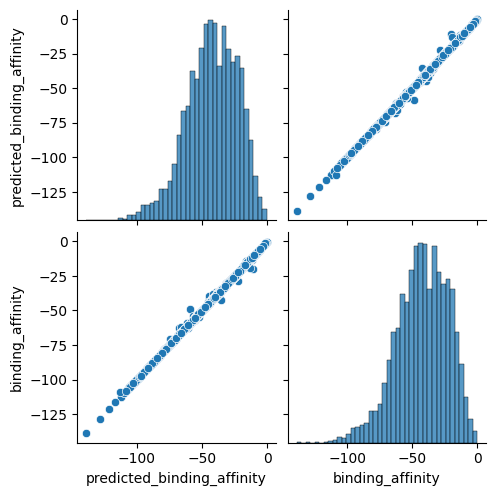

In [51]:
# # Create a new DataFrame with the predicted and actual binding affinity values for the training data
# predicted_vs_actual_train = pd.DataFrame({'predicted_binding_affinity': model.predict(X_train), 'binding_affinity': y_train})

# # Use seaborn's pairplot function to create a scatterplot matrix
# sns.pairplot(predicted_vs_actual_train)
# plt.show()

In [52]:
# threshold = -8.0
# autodock_results['binders'] = autodock_results['predicted_binding_affinity'].apply(lambda x: x <= threshold)
# print("Number of binders:", autodock_results['binders'].sum())
# print("Number of non-binders:", len(autodock_results) - autodock_results['binders'].sum())

Number of binders: 0
Number of non-binders: 1


In [53]:
# for index, row in autodock_results.iterrows():
#     if row['predicted_binding_affinity'] <= threshold:
#         print(f"Complex {index} is a binder")
#     else:
#         print(f"Complex {index} is a non-binder")

Complex 0 is a non-binder
